In [62]:
# Importing necessary libraries and packages
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
# Loading data as numpy array from csv database files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop = True)

In [51]:
# Counting number of rows and columns in the data
print('Shape of Training Data: ', train.shape)

# Gettiing a hang of the data in each column and their names
print('\n \n TRAIN \n', train.head())
print('\n \n TEST \n', test.head())

# Looking for any places where training data has NaN values
print('\n \nNumber of Null values in Train Set: ', train['text'].isna().sum())
print('Number of Null values in Test Set: ', test['text'].isna().sum())

# Dropping all rows where text column is NaN
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

Shape of Training Data:  (20800, 5)

 
 TRAIN 
    id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  

 
 TEST 
                                                    title  \
id                          

In [52]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length

print(min(train['length']), max(train['length']), round(sum(train['length'])/len(train['length'])))

1 142961 4553


In [53]:
# Minimum length is 1. We need to spot some outliers and get rid of them. Counting how many outliers are there
print(len(train[train['length'] < 50]))

# Skimming through such short texts just to be sure
print(train['text'][train['length'] < 50])

# Removing outliers, it will reduce overfitting
train = train.drop(train['text'][train['length'] < 50].index, axis = 0)

print(min(train['length']), max(train['length']), round(sum(train['length'])/len(train['length'])))

207
82                                                   
169                                                  
173                                   Guest   Guest  
196            They got the heater turned up on high.
295                                                  
                             ...                     
20350                         I hope nobody got hurt!
20418                                 Guest   Guest  
20431    \nOctober 28, 2016 The Mothers by stclair by
20513                                                
20636                              Trump all the way!
Name: text, Length: 207, dtype: object
50 142961 4598


In [54]:
# Secluding labels in a new pandas dataframe for supervised learning
train_labels = train['label']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

In [55]:
# Setting up Term Frequency - Inverse Document Frequency Vectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform training set and transform test set
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])

In [56]:
# Setting up Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter = 50)

# Fitting on the training set
pac.fit(tfidf_train, y_train)

# Predicting on the test set
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 96.98%


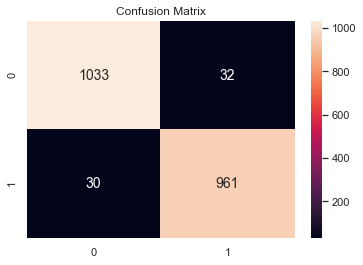


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1065
           1       0.97      0.97      0.97       991

    accuracy                           0.97      2056
   macro avg       0.97      0.97      0.97      2056
weighted avg       0.97      0.97      0.97      2056



In [68]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
#ax.text({0: 'Real', 1: 'Fake'})
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.show()


print('\nClassification Report: \n', classification_report(y_test, (y_pred > 0.5)))

In [207]:
test_pred = pac.predict(tfidf_test_final)

submission = pd.DataFrame({'id':test.index, 'label':test_pred})
print(submission.shape, submission.head())

submission.to_csv('submission.csv', index = False)

(5200, 2)       id  label
0  20800      0
1  20801      1
2  20802      1
3  20803      0
4  20804      1
